In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
def quick_vis(experiment_name="experiments/test_popusize=100_enemy=2_gens=100_hiddensize=10_u=1_l=-1_mutationtype=correlated_init=kaiming"):

    # Load and process data
    data = []
    with open(f'./{experiment_name}/results.txt', 'r') as f:
        for line in f:
            data.append(line.strip().split()[2:6])

    generations = list(range(1, len(data) + 1))
    best = [float(row[0]) for row in data]
    average = [float(row[1]) for row in data]
    std = [float(row[2]) for row in data]

    # Set plot style
    plt.figure(figsize=(12, 7))
    sns.set(style='whitegrid')

    # Plot 'average' with line and 'std' as a filled area
    plt.plot(generations, average, label='Average', color='orange', linestyle='--', marker='s', markersize=6, linewidth=2)
    plt.fill_between(generations, [a - s for a, s in zip(average, std)], [a + s for a, s in zip(average, std)], 
                    color='orange', alpha=0.3, label='Standard Deviation')

    # Plot 'best' as a separate line
    plt.plot(generations, best, label='Best', color='purple', linestyle='-', marker='o', markersize=6, linewidth=2)

    # Customize labels and title
    plt.xlabel('Generation', fontsize=14)
    plt.ylabel('Fitness', fontsize=14)
    plt.title('Performance Over Generations', fontsize=16)

    # Customize ticks
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)

    # Add a legend
    plt.legend(fontsize=12, loc='upper right')

    # Add gridlines
    plt.grid(True, which='both', linestyle='--', linewidth=0.7)

    # Adjust layout
    plt.tight_layout()

    # Show the plot
    plt.show()

In [3]:
quick_vis()

FileNotFoundError: [Errno 2] No such file or directory: './experiments/test_popusize=100_enemy=2_gens=100_hiddensize=10_u=1_l=-1_mutationtype=correlated_init=kaiming/results.txt'

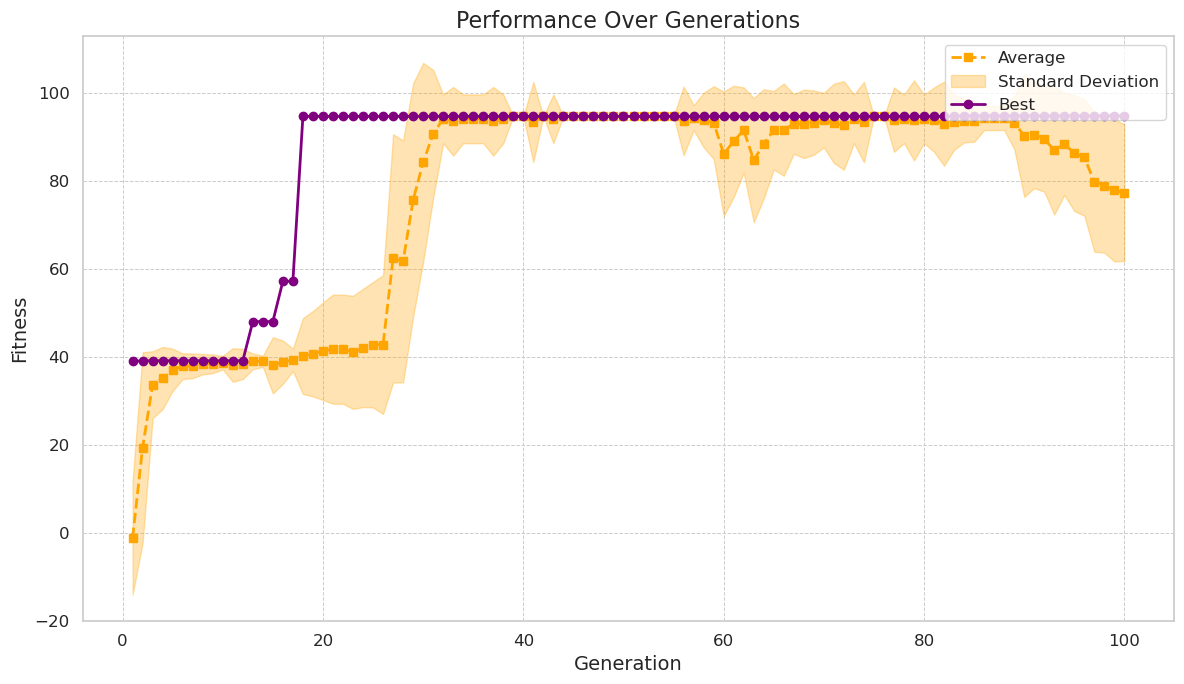

In [4]:
quick_vis("experiments/test_popusize=100_enemy=1_gens=100_hiddensize=10_u=1_l=-1_mutationtype=correlated_init=kaiming")

In [3]:
%load_ext autoreload
%autoreload 2


pygame 2.6.0 (SDL 2.28.4, Python 3.11.5)
Hello from the pygame community. https://www.pygame.org/contribute.html

MESSAGE: Pygame initialized for simulation.


In [4]:
import sys
from specialist_silvia import Specialist
import numpy as np

def get_individual_gain_correlated(exp='run1', etr='1', ete='1'):
    sys.argv = ['notebook', 
                '--k',
                '-m', 'correlated', 
                '-etr', etr,
                '-ete', ete,
                '-exp', exp]  # Example arguments

    individual_gain = np.array([Specialist().test(type="individual gain") for _ in range(5)])
    return individual_gain.mean()
total_runs = []
for enemy in ['1','3','5']:
    total_runs.append([get_individual_gain_correlated(exp=f'run{run}', etr=enemy, ete=enemy) for run in range(1, 11)])
total_runs = np.array(total_runs)

pygame 2.6.0 (SDL 2.28.4, Python 3.11.5)
Hello from the pygame community. https://www.pygame.org/contribute.html

MESSAGE: Pygame initialized for simulation.
Fitness of the best individual against enemy 1: 100

MESSAGE: Pygame initialized for simulation.
Fitness of the best individual against enemy 1: 100

MESSAGE: Pygame initialized for simulation.
Fitness of the best individual against enemy 1: 100

MESSAGE: Pygame initialized for simulation.
Fitness of the best individual against enemy 1: 100

MESSAGE: Pygame initialized for simulation.
Fitness of the best individual against enemy 1: 100

MESSAGE: Pygame initialized for simulation.
Fitness of the best individual against enemy 1: 100

MESSAGE: Pygame initialized for simulation.
Fitness of the best individual against enemy 1: 100

MESSAGE: Pygame initialized for simulation.
Fitness of the best individual against enemy 1: 100

MESSAGE: Pygame initialized for simulation.
Fitness of the best individual against enemy 1: 100

MESSAGE: Pyga

In [5]:
print(total_runs.shape)

(3, 10)


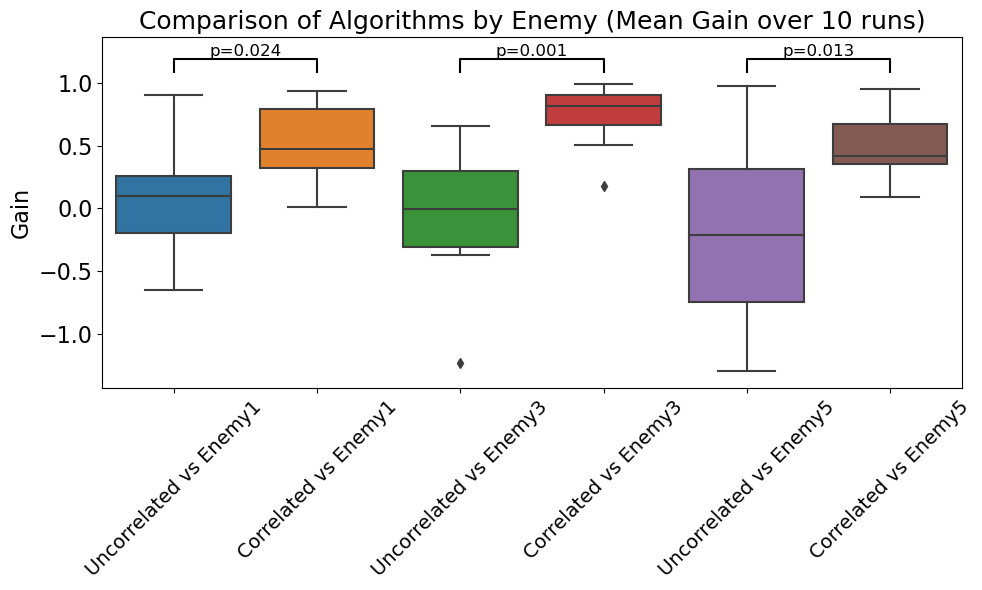

In [61]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind

np.random.seed(42)

algorithms = ['Uncorrelated', 'Correlated']
enemies = ['Enemy1', 'Enemy3', 'Enemy5']

gain_values = np.random.normal(loc=0, scale=5, size=(10, 2, 3, 5)) *0.3

mean_values = np.mean(gain_values, axis=3)
total_runs = np.random.rand(10, 3)
mean_values[:, 1, :] = total_runs
# mean_values[:, 1, :] = total_runs

boxplot_data = []
labels = []
for enemy_idx, enemy in enumerate(enemies):
    for alg_idx, alg in enumerate(algorithms):
        boxplot_data.append(mean_values[:, alg_idx, enemy_idx])
        labels.append(f'{alg} vs {enemy}')

plt.figure(figsize=(10, 6))
sns.boxplot(data=boxplot_data)
plt.xticks(ticks=np.arange(len(labels)), labels=labels, rotation=45, fontsize=14)
plt.yticks(fontsize=16)
plt.title('Comparison of Algorithms by Enemy (Mean Gain over 10 runs)', fontsize=18)
plt.ylabel('Gain', fontsize=16)

# Statistical test (t-test) between pairs of algorithms for each enemy
p_values = []
for enemy_idx, enemy in enumerate(enemies):
    for i in range(len(algorithms)):
        for j in range(i + 1, len(algorithms)):
            t_stat, p_value = ttest_ind(mean_values[:, i, enemy_idx], mean_values[:, j, enemy_idx])
            p_values.append((i, j, enemy_idx, p_value))

fixed_y = np.max(mean_values) + np.max(mean_values)*0.1
fixed_y_lower = np.min(mean_values) + np.min(mean_values)*0.1
for (i, j, enemy_idx, p_value) in p_values:
    x1 = i + enemy_idx * len(algorithms)
    x2 = j + enemy_idx * len(algorithms)
    plt.plot([x1, x1, x2, x2], [fixed_y, fixed_y + 0.1, fixed_y + 0.1, fixed_y], color='k')
    plt.text((x1 + x2) / 2, fixed_y + 0.1, f'p={p_value:.3f}', ha='center', va='bottom', fontsize=12)

plt.ylim(fixed_y_lower, fixed_y+ fixed_y*0.25)
plt.tight_layout()
plt.show()


In [62]:
def get_fitness_correlated(exp='run1', etr='1', ete='1'):
    sys.argv = ['notebook', 
                '--k',
                '-m', 'correlated', 
                '-etr', etr,
                '-ete', ete,
                '-exp', exp]  # Example arguments

    fitness = np.array([Specialist().test(type="fitness") for _ in range(5)])
    return fitness
total_runs = []
for enemy in ['1','3','5']:
    total_runs.append([get_individual_gain_correlated(exp=f'run{run}', etr=enemy, ete=enemy) for run in range(1, 11)])
total_runs = np.array(total_runs)


MESSAGE: Pygame initialized for simulation.
Fitness of the best individual against enemy 1: 100

MESSAGE: Pygame initialized for simulation.
Fitness of the best individual against enemy 1: 100

MESSAGE: Pygame initialized for simulation.
Fitness of the best individual against enemy 1: 100

MESSAGE: Pygame initialized for simulation.
Fitness of the best individual against enemy 1: 100

MESSAGE: Pygame initialized for simulation.
Fitness of the best individual against enemy 1: 100

MESSAGE: Pygame initialized for simulation.
Fitness of the best individual against enemy 1: 100

MESSAGE: Pygame initialized for simulation.
Fitness of the best individual against enemy 1: 100

MESSAGE: Pygame initialized for simulation.
Fitness of the best individual against enemy 1: 100

MESSAGE: Pygame initialized for simulation.
Fitness of the best individual against enemy 1: 100

MESSAGE: Pygame initialized for simulation.
Fitness of the best individual against enemy 1: 100

MESSAGE: Pygame initialized f

In [122]:
def get_results_run(experiment_name):
    data = []
    with open(f'./{experiment_name}/results.txt', 'r') as f:
        for line in f:
            data.append(line.strip().split()[2:6])
    if len(data) != 100:
        print(experiment_name)
        print(len(data))
    return data

total_results = []
for enemy in [1,3,5]:
    results = [get_results_run(f"experiments/run{i}_popusize=100_enemy={enemy}_gens=100_hiddensize=10_u=1_l=-1_mutationtype=correlated_csigma=0.3_cc=0.2_c1=0.1_cmu=0.1_dsigma=0.5_sigma=0.5_init=kaiming")
            for i in range(1, 11)]
    total_results.append(results)
total_results = np.array(total_results, dtype=float)
mean_total_results = np.mean(total_results, axis=1)

bests = mean_total_results[:, :, 0]
bests_std = np.std(total_results[:, :, :, 0], axis=1)

means = mean_total_results[:, :, 1]
means_std = np.std(total_results[:, :, :, 1], axis=1)

stds = mean_total_results[:, :, 2]
stds_std = np.std(total_results[:, :, :, 2], axis=1)

In [135]:
# total_results = np.random.rand(3, 10, 100, 3) * 100  # Placeholder for actual data

# Calculate mean and std across runs for each algorithm
# mean_total_results = np.mean(total_results, axis=1)  # Shape: (3, 100, 3)
# std_total_results = np.std(total_results, axis=1)    # Shape: (3, 100, 3)

def plot_1(generations, enemy_idxs, bests, means, stds, bests_std, means_std, stds_std):
    

# Plot for each enemy
    plt.figure(figsize=(30, 6))
    
    for enemy_idx in range(3)
    # Plot mean fitness
    plt.plot(generations, bests[enemy_idx, :], label='Best Fitness')
    plt.fill_between(generations,
                    bests[enemy_idx, :] - bests_std[enemy_idx, :],
                    bests[enemy_idx, :] + bests_std[enemy_idx, :],
                    alpha=0.2)

    # Plot max fitness
    plt.plot(generations, means[enemy_idx, :], label='Mean Fitness')
    plt.fill_between(generations,
                    means[enemy_idx, :] - means_std[enemy_idx, :],
                    means[enemy_idx, :] + means_std[enemy_idx, :],
                    alpha=0.2)
    
    # plt.plot(generations, stds[enemy_idx, :], label='Std Fitness')
    # plt.fill_between(generations,
    #                 stds[enemy_idx, :] - stds_std[enemy_idx, :],
    #                 stds[enemy_idx, :] + stds_std[enemy_idx, :],
    #                 alpha=0.2)

    plt.title(f'Fitness Comparison for {enemies[enemy_idx]}', fontsize=18)
    plt.xlabel('Generations', fontsize=16)
    plt.ylabel('Fitness', fontsize=16)
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    plt.legend(fontsize=18)
    plt.grid()
    plt.tight_layout()
    plt.show()

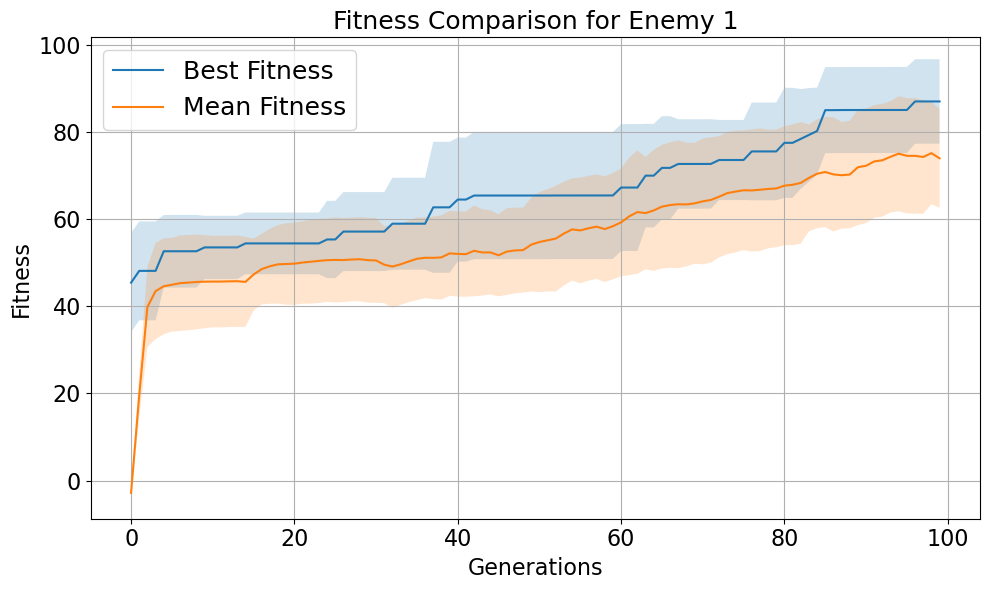

In [136]:
generations = np.arange(total_results.shape[2])
plot_1(generations, 0, bests, means, stds, bests_std, means_std, stds_std)

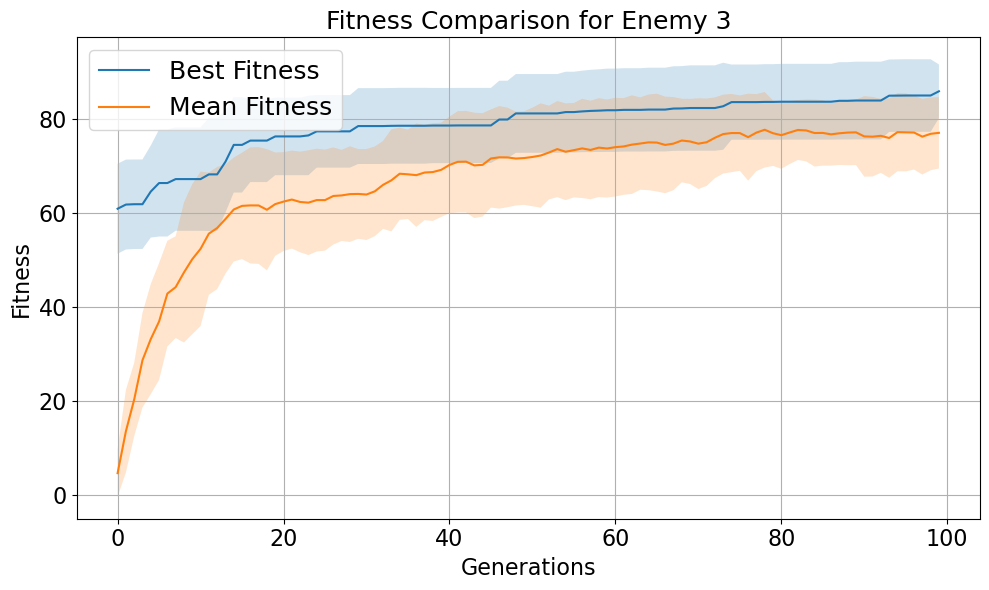

In [137]:
plot_1(generations, 1, bests, means, stds, bests_std, means_std, stds_std)

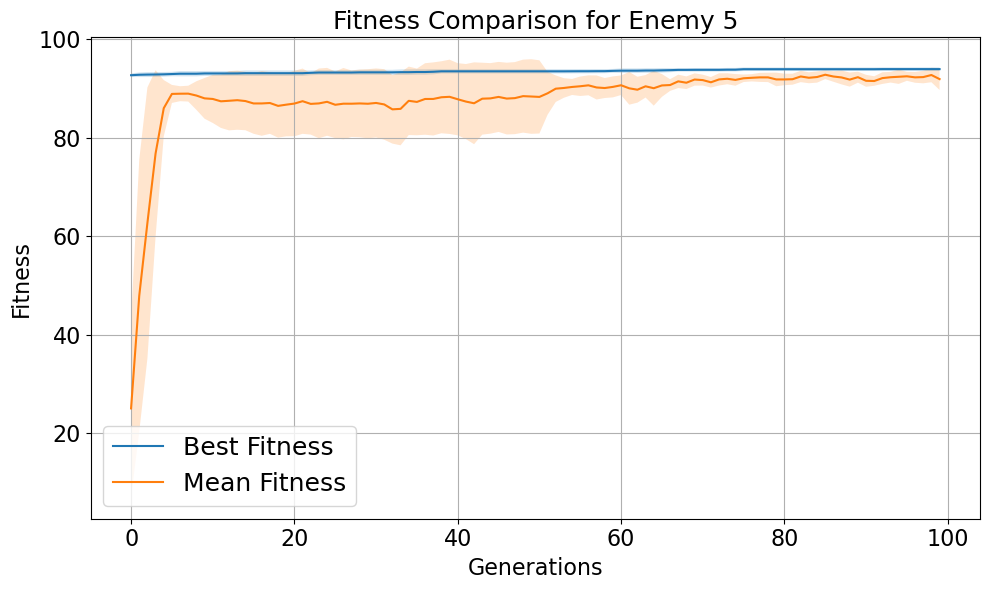

In [138]:
plot_1(generations, 2, bests, means, stds, bests_std, means_std, stds_std)

In [154]:
def plot_2(generations, enemy_names, bests, means, stds, bests_std, means_std, stds_std):
    # Set up the figure and axes for 3 subplots side by side
    fig, axs = plt.subplots(1, 3, figsize=(30, 6), sharey=True)
    small_font = 30
    big_font = 35
    
    for enemy_idx, ax in zip(range(3), axs):
        # Plot best fitness
        ax.plot(generations, bests[enemy_idx, :], label='Best Fitness')
        ax.fill_between(generations,
                        bests[enemy_idx, :] - bests_std[enemy_idx, :],
                        bests[enemy_idx, :] + bests_std[enemy_idx, :],
                        alpha=0.2)

        # Plot mean fitness
        ax.plot(generations, means[enemy_idx, :], label='Mean Fitness')
        ax.fill_between(generations,
                        means[enemy_idx, :] - means_std[enemy_idx, :],
                        means[enemy_idx, :] + means_std[enemy_idx, :],
                        alpha=0.2)

        # Uncomment to plot std fitness if needed
        # ax.plot(generations, stds[enemy_idx, :], label='Std Fitness')
        # ax.fill_between(generations,
        #                 stds[enemy_idx, :] - stds_std[enemy_idx, :],
        #                 stds[enemy_idx, :] + stds_std[enemy_idx, :],
        #                 alpha=0.2)

        ax.set_title(f'Fitness Comparison for Enemy {enemy_names[enemy_idx]}', fontsize=big_font)
        ax.set_xlabel('Generations', fontsize=small_font)
        if enemy_idx == 0:
            ax.set_ylabel('Fitness', fontsize=small_font)
        ax.tick_params(axis='both', labelsize=small_font)
        if enemy_idx == 1:
            ax.legend(fontsize=small_font)
        ax.grid()

    plt.tight_layout()
    plt.show()

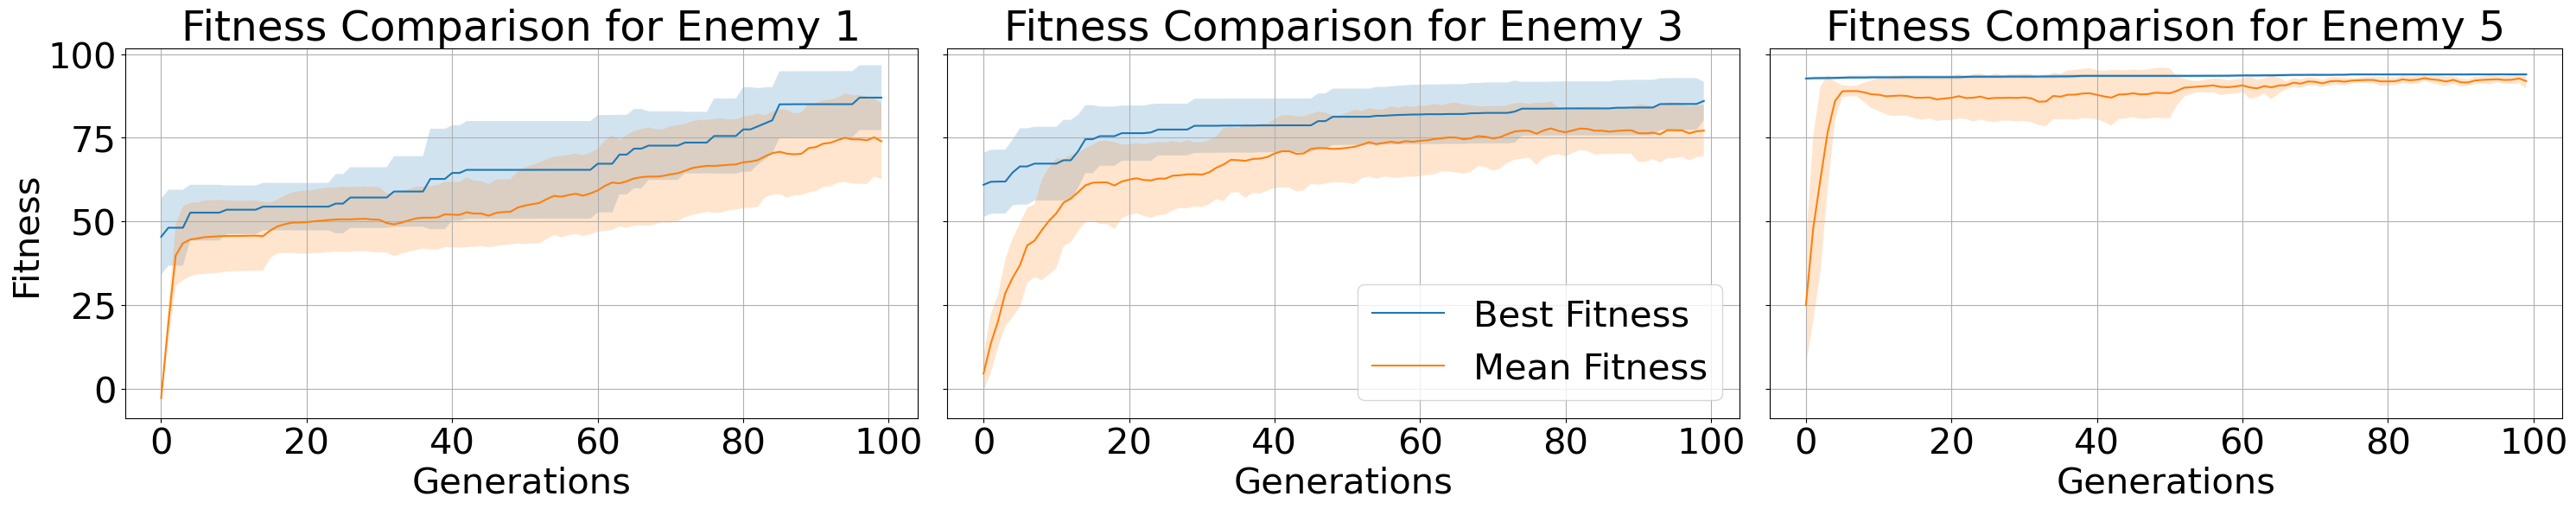

In [155]:
plot_2(generations, [1,3,5], bests, means, stds, bests_std, means_std, stds_std)